**Informe del Análisis de Calidad de Datos:**

Documentar en formato markdown los resultados del análisis de calidad de los datos, identificando problemas encontrados (como valores faltantes o inconsistencias) y detallando las soluciones implementadas para garantizar la confiabilidad del análisis posterior.

Descripción de los datos:
                  id  cash_request_id             type    status  \
count   21061.000000     21057.000000            21061     21061   
unique           NaN              NaN                3         4   
top              NaN              NaN  instant_payment  accepted   
freq             NaN              NaN            11099     14841   
mean    10645.355111     16318.449162              NaN       NaN   
min         1.000000      1456.000000              NaN       NaN   
25%      5385.000000     11745.000000              NaN       NaN   
50%     10652.000000     17160.000000              NaN       NaN   
75%     15925.000000     21796.000000              NaN       NaN   
max     21193.000000     27010.000000              NaN       NaN   
std      6099.315256      6656.149949              NaN       NaN   

                     category  total_amount                 reason  \
count                    2196  21061.000000                  21061   
unique           

/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_26843/2856637202.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')
/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_26843/2856637202.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


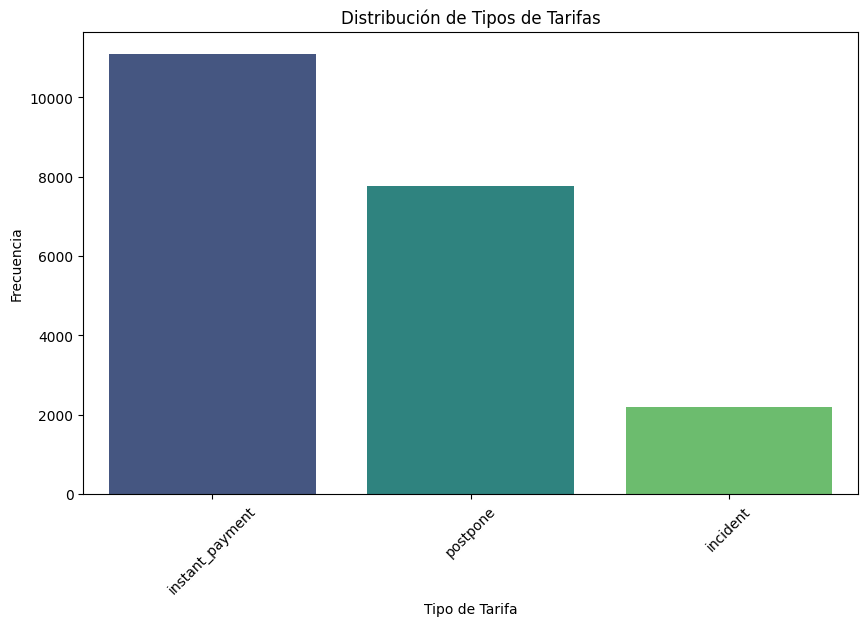

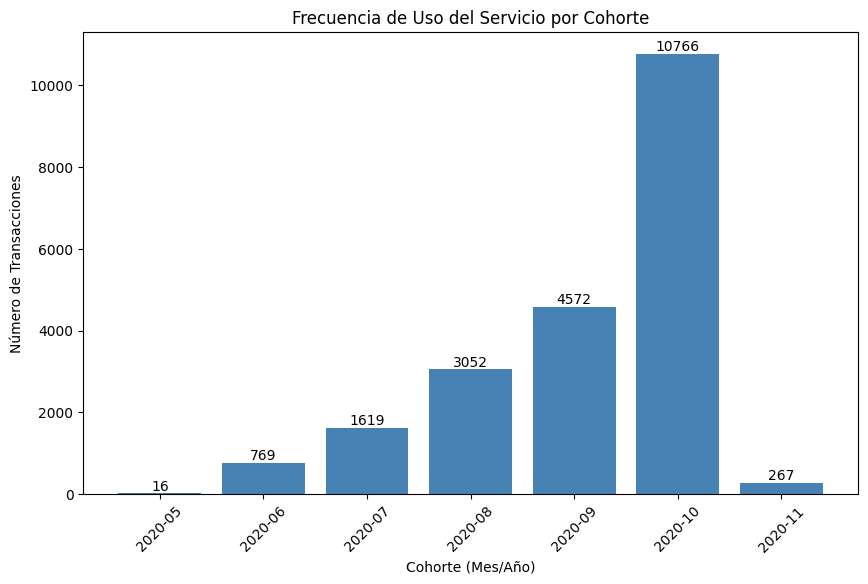

posx and posy should be finite values
posx and posy should be finite values


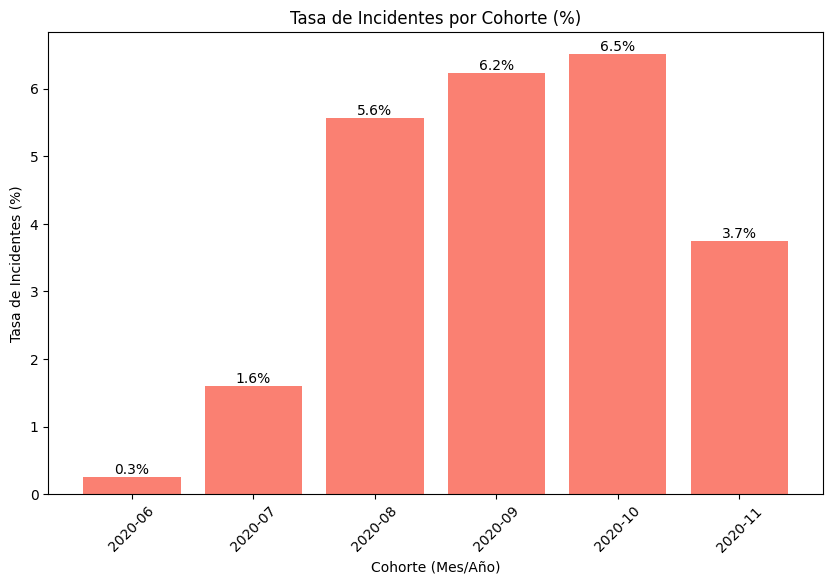

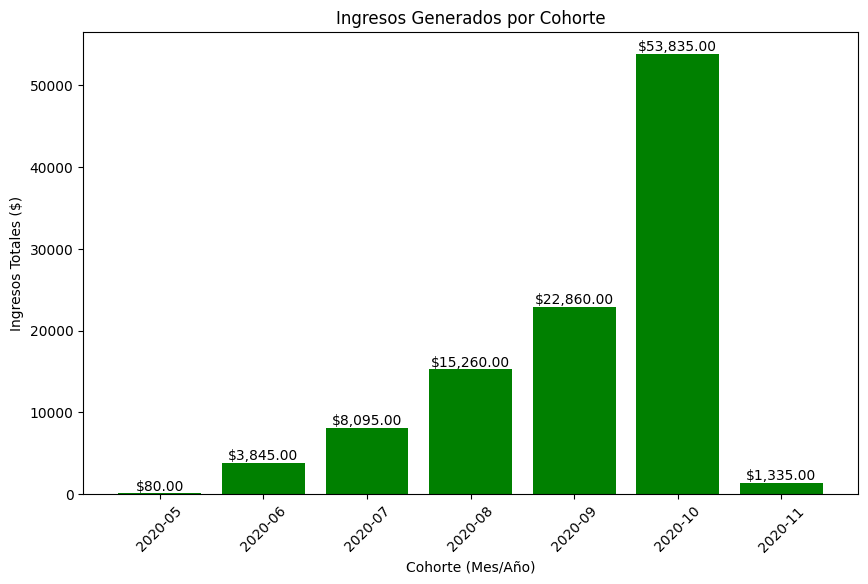

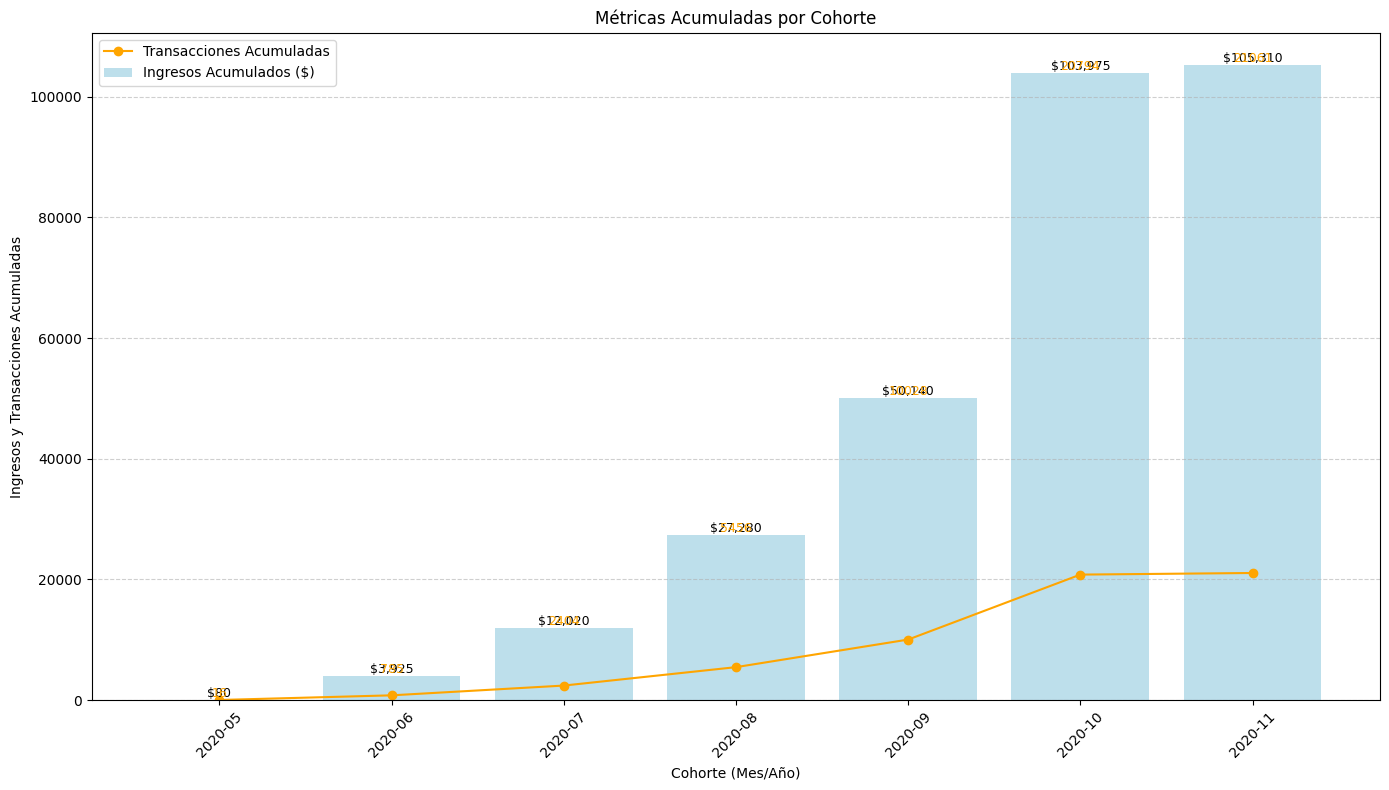


INSIGHTS RELEVANTES:
- Cohorte con mayor frecuencia de uso: 2020-10 (10766 transacciones)
- Cohorte con mayor tasa de incidentes: 2020-10 (6.51%)
- Cohorte con mayores ingresos: 2020-10 ($53,835.00)
- Total de ingresos acumulados: $105,310.00


In [4]:
%run '01-EDA-fees.ipynb'

Calidad de los datos:
             Column  Non_Null_Count  Non_Null_Percentage  Null_Count  \
4          category            2196            10.426855       18865   
11          to_date            6512            30.919709       14549   
10        from_date            6749            32.045012       14312   
9           paid_at           15438            73.301363        5623   
1   cash_request_id           21057            99.981008           4   
0                id           21061           100.000000           0   
2              type           21061           100.000000           0   
3            status           21061           100.000000           0   
5      total_amount           21061           100.000000           0   
6            reason           21061           100.000000           0   
7        created_at           21061           100.000000           0   
8        updated_at           21061           100.000000           0   
12    charge_moment           21061       

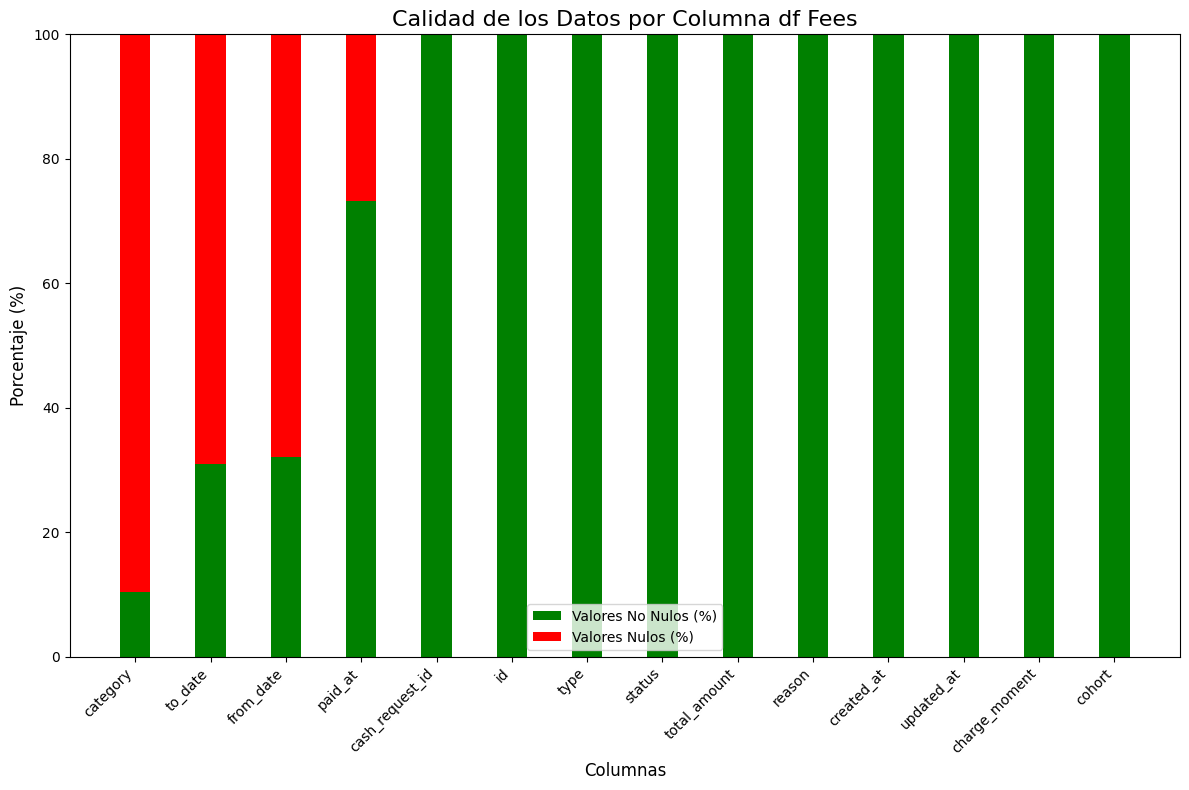

In [5]:
#Control de datos/calidad
# Conteo de valores no nulos y nulos
total_rows = len(df)
null_counts = df.isnull().sum()
non_null_counts = total_rows - null_counts

# Creo DataFrame resumen con información de valores correctos y nulos
data_quality_summary = pd.DataFrame({
    'Column': df.columns,
    'Non_Null_Count': non_null_counts.values,
    'Non_Null_Percentage': (non_null_counts.values / total_rows) * 100,
    'Null_Count': null_counts.values,
    'Null_Percentage': (null_counts.values / total_rows) * 100
}).sort_values(by='Null_Count', ascending=False)

# Muestro el resumen en una tabla
print("Calidad de los datos:")
print(data_quality_summary)

# Exporto a un archivo CSV (opcional)
#output_path = "data_quality_summary.csv"
#data_quality_summary.to_csv(output_path, index=False)

# Gráfico para visualizar la calidad de los datos
plt.figure(figsize=(12, 8))
# Agrupo barras de valores nulos y no nulos
width = 0.4
x = range(len(data_quality_summary))

plt.bar(x, data_quality_summary['Non_Null_Percentage'], width, label='Valores No Nulos (%)', color='green')
plt.bar(x, data_quality_summary['Null_Percentage'], width, bottom=data_quality_summary['Non_Null_Percentage'], label='Valores Nulos (%)', color='red')

# Etiqueto
plt.title("Calidad de los Datos por Columna df Fees", fontsize=16)
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(x, data_quality_summary['Column'], rotation=45, ha='right')
plt.legend()

# Muestro el gráfico
plt.tight_layout()
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15438 non-null  datetime64[ns, UTC]
 10  from_date        6749 non-null   datetime64[ns, UTC]
 11  to_date          6512 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
 13  cohort          

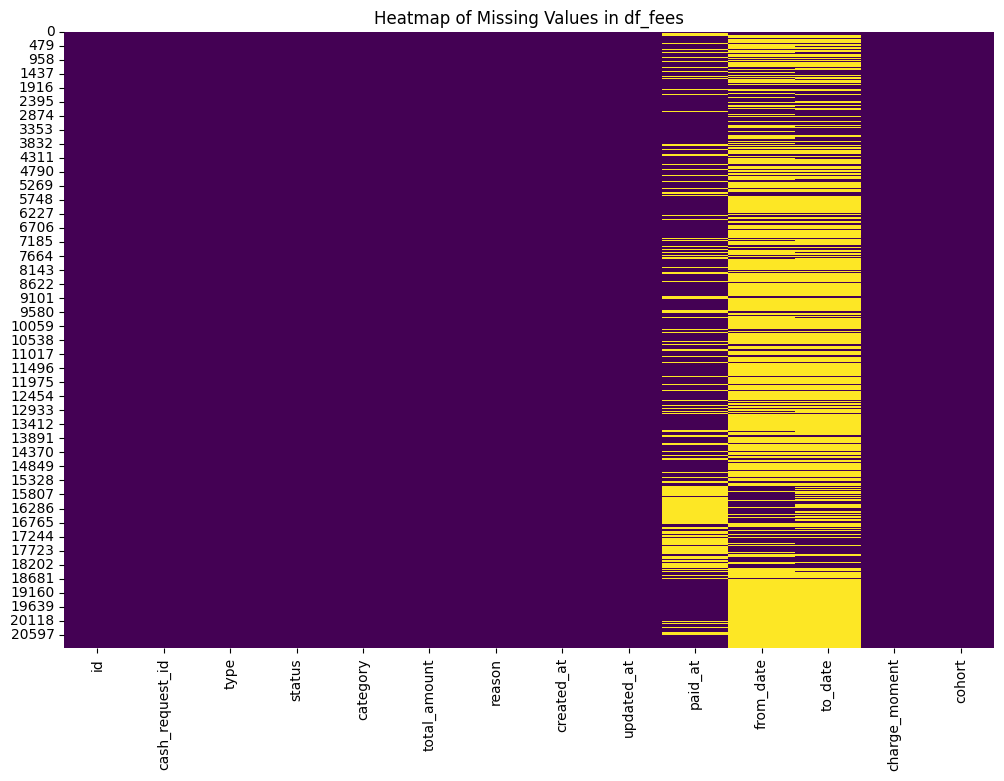

In [ ]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_fees.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_fees")
plt.show()

In [11]:
df['category'].unique()

array([nan, 'rejected_direct_debit', 'month_delay_on_payment'],
      dtype=object)

In [13]:
df['paid_at'].describe()

count                                  15438
mean     2020-10-23 00:23:01.527642112+00:00
min         2020-06-23 08:20:48.421740+00:00
25%      2020-10-05 19:43:40.496603904+00:00
50%      2020-11-02 17:39:36.584861952+00:00
75%      2020-11-10 19:52:35.532152064+00:00
max         2021-02-12 13:38:02.212332+00:00
Name: paid_at, dtype: object

In [14]:
df['from_date'].describe()

count                                   6749
mean     2020-09-16 06:27:30.812861184+00:00
min                2020-05-27 22:00:00+00:00
25%                2020-08-05 22:00:00+00:00
50%                2020-09-25 23:51:00+00:00
75%                2020-10-28 22:00:00+00:00
max                2021-01-02 22:00:00+00:00
Name: from_date, dtype: object

In [15]:
df['to_date'].describe()

count                                   6512
mean     2020-10-14 02:03:26.441339136+00:00
min                2020-06-09 22:00:00+00:00
25%                2020-09-19 07:00:00+00:00
50%                2020-10-29 11:00:00+00:00
75%                2020-11-07 10:00:00+00:00
max                2021-01-17 22:00:00+00:00
Name: to_date, dtype: object

Observaciones de la data:

Según la descripción de los datos proporcionada, podemos comenzar analizando sistemáticamente los valores faltantes y sus relaciones. Procedamos paso a paso.

Columna: category

Valores únicos: ['rejected_direct_debit', 'month_delay_on_paid', NaN].
Esta columna tiene un alto porcentaje de valores faltantes (solo 2196 no nulos de 21 061 filas).
Nota: Con solo dos valores únicos no nulos, esta columna se puede clasificar en categorías binarias o nominales.

Columna: paid_at

Las estadísticas resumidas muestran que los datos oscilan entre el 23 de junio de 2020 y el 12 de febrero de 2021.
Falta: ~26% de los datos.

Columna: from_date y to_date

from_date tiene 6.749 entradas no nulas, mientras que to_date tiene 6.512.
Ambos representan intervalos de tiempo, con from_date anterior a to_date.
Los valores faltantes pueden ser imputables utilizando patrones temporales.

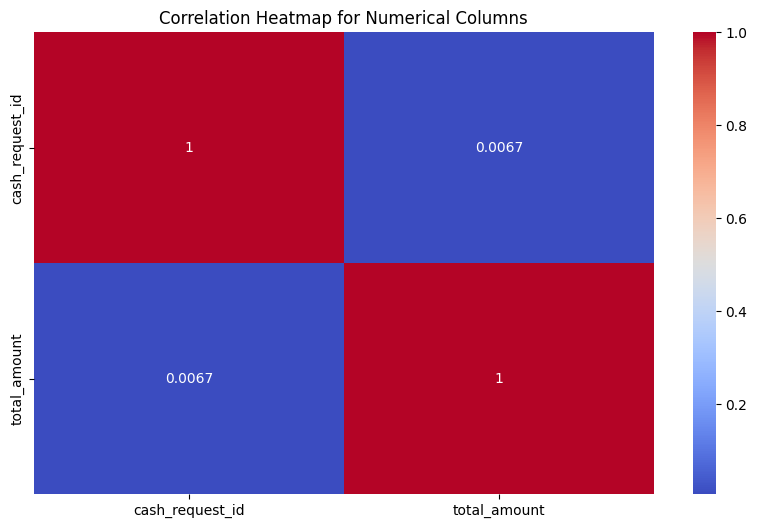

In [22]:
#Análisis de correlación
numerical_columns = ['cash_request_id', 'total_amount']
correlation_matrix = df_fees[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()


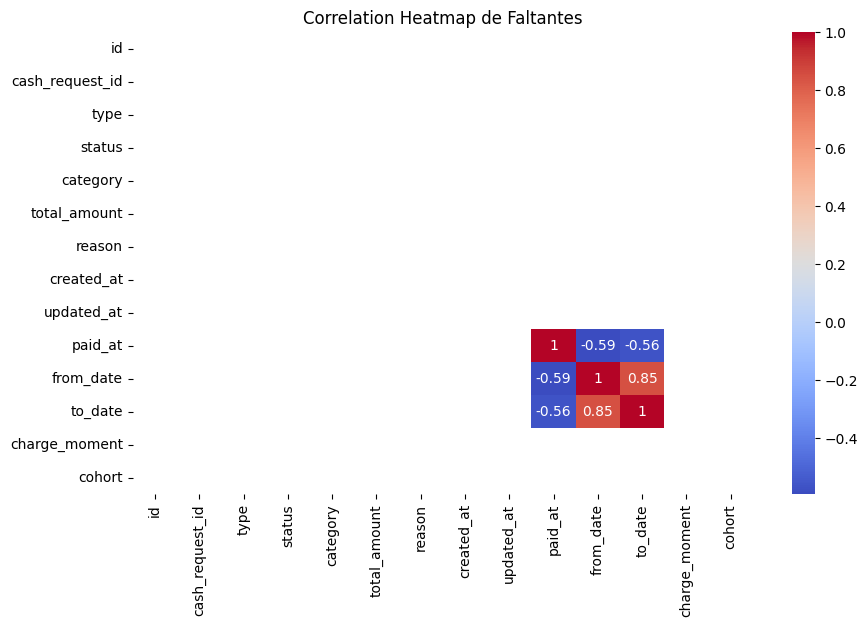

In [23]:
# Binary DataFrame para valores faltantes
missing_binary = df_fees.isnull().astype(int)

# correlacion de faltantes
missing_corr = missing_binary.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap de Faltantes")
plt.show()


Correlación de faltantes:
Los valores faltantes de from_date, to_date ypaid_at están altamente correlacionados (~0,85 entre from_date y to_date, -0,59 conpaid_at), lo que indica que cuando falta uno de estos, es probable que también falten otros.

Información procesable: esta fuerte relación sugiere una dependencia temporal, y podemos considerar imputar estas columnas de forma conjunta utilizando modelos de interpolación o regresión.

In [24]:
# Cross-tabulation with 'reason' and 'type'
print(pd.crosstab(df_fees['category'], df_fees['reason']))
print(pd.crosstab(df_fees['category'], df_fees['type']))

reason                  Instant Payment Cash Request 10000  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reason                  Instant Payment Cash Request 10003  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reason                  Instant Payment Cash Request 10010  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reason                  Instant Payment Cash Request 10012  \
category                                                     
month_delay_on_payment                                   0   
rejected_direct_debit                                    1   

reas

##Imputación de los datos de las columnas con datos faltantes##

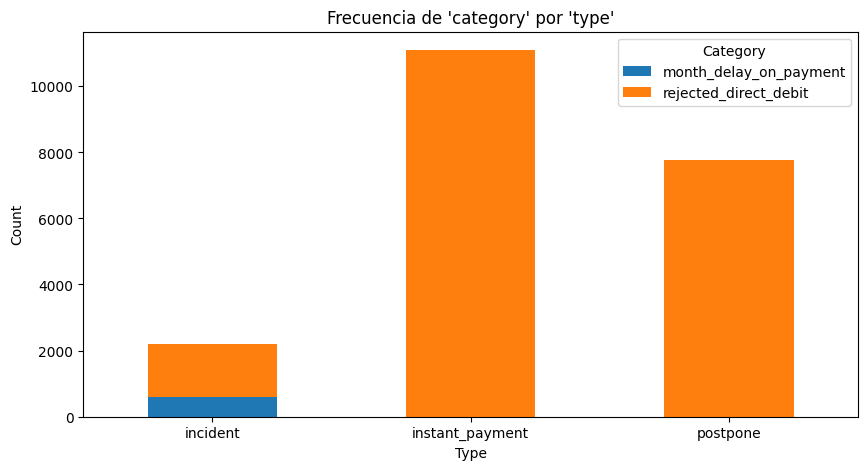

In [27]:
# Agrupar  'type' 7 'category'
category_type_counts = df_fees.groupby(['type', 'category']).size().unstack(fill_value=0)

# Plot
category_type_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Frecuencia de 'category' por 'type'")
plt.ylabel("Count")
plt.xlabel("Type")
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()



Observaciones clave
Tipo de incidente:

Contiene una combinación de débito_directo_rechazado y retraso_del_mes_en_pago.
Sin embargo, el débito_directo_rechazado es más frecuente que el retraso_del_mes_en_pago.
pago_instantáneo y posponer Tipos:

Ambos están asociados exclusivamente con la categoría de débito_directo_rechazado.
No hay casos de Month_delay_on_paid para estos tipos.

In [28]:
# Función para imputar 'category'
def impute_category(row):
    if pd.isnull(row['category']):
        if row['type'] in ['instant_payment', 'postpone']:
            return 'rejected_direct_debit'
        elif row['type'] == 'incident':
            # Assign based on observed proportions
            return 'rejected_direct_debit' if np.random.rand() < 0.8 else 'month_delay_on_payment'
    return row['category']

# Aplicar la función al df
df_fees['category'] = df_fees.apply(impute_category, axis=1)
df_fees['category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21061 entries, 0 to 21060
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
21061 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


Paso 1: comprender las relaciones entre columnas
from_date y to_date:

Estos están fuertemente correlacionados (correlación de 0,85).
from_date siempre debe ser anterior a to_date.
pagado_en:

Representa una fecha de pago. Normalmente debería ocurrir después de from_date y antes de to_date.

In [30]:
# Convert 'from_date' and 'to_date' to numeric (timestamps)
df_fees['from_date_numeric'] = df_fees['from_date'].astype('int64')  # Convert datetime to nanoseconds
df_fees['to_date_numeric'] = df_fees['to_date'].astype('int64')

# Interpolate missing values for the numeric columns
df_fees['from_date_numeric'] = df_fees['from_date_numeric'].interpolate(method='linear')
df_fees['to_date_numeric'] = df_fees['to_date_numeric'].interpolate(method='linear')

# Convert back to datetime
df_fees['from_date'] = pd.to_datetime(df_fees['from_date_numeric'], unit='ns')
df_fees['to_date'] = pd.to_datetime(df_fees['to_date_numeric'], unit='ns')

# Drop temporary numeric columns
df_fees.drop(columns=['from_date_numeric', 'to_date_numeric'], inplace=True)

# Validate the results
print("Remaining missing values in 'from_date':", df_fees['from_date'].isnull().sum())
print("Remaining missing values in 'to_date':", df_fees['to_date'].isnull().sum())


Remaining missing values in 'from_date': 14312
Remaining missing values in 'to_date': 14549


Esta fue una primera prueba realizada, donde no funcionó la interpolación con valores vecinos, debido a los espacios que hay unos entre otros. Por eso quedaron tantos datos faltantes, y muchos otros como NAT. 

A continuación una prueba dos, donde se plantea la siguiente lógica:

- Si paid_at existe, from_date puede ser predeterminado en paid_at - X días.
- Si from_date existe pero to_date no, establezca to_date = from_date + default_duration.
- Completar los espacios restantes con valores medios o medianos de from_date y to_date para el conjunto de datos

In [38]:
# Calcular la duración media en dias entre  'from_date' y 'to_date' exist
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days
mean_duration_days = df_fees['duration_days'].mean()
mean_duration_days

np.float64(20.382323232323234)

In [44]:
# Convert 'from_date' and 'to_date' to UTC (timezone-aware)
df_fees['from_date'] = pd.to_datetime(df_fees['from_date'], utc=True)
df_fees['to_date'] = pd.to_datetime(df_fees['to_date'], utc=True)

# Convert 'from_date' and 'to_date' to numeric timestamps
median_from_date = pd.to_datetime(df_fees['from_date']).dropna().astype('int64').median()
median_to_date = pd.to_datetime(df_fees['to_date']).dropna().astype('int64').median()

# Convert the median back to datetime
median_from_date = pd.to_datetime(median_from_date, unit='ns')
median_to_date = pd.to_datetime(median_to_date, unit='ns')

# Fill missing 'from_date' and 'to_date' with their respective medians
df_fees['from_date'].fillna(median_from_date, inplace=True)
df_fees['to_date'].fillna(median_to_date, inplace=True)

# Validate the results
print("Remaining missing values in 'from_date':", df_fees['from_date'].isnull().sum())
print("Remaining missing values in 'to_date':", df_fees['to_date'].isnull().sum())



Remaining missing values in 'from_date': 0
Remaining missing values in 'to_date': 0


/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_26843/2563924956.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fees['from_date'].fillna(median_from_date, inplace=True)
/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_26843/2563924956.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020-10-13 16:55:18.662350080' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.

In [51]:
# Convert 'from_date', 'to_date', and 'paid_at' to UTC timezone-aware
df_fees['from_date'] = pd.to_datetime(df_fees['from_date'], utc=True)
df_fees['to_date'] = pd.to_datetime(df_fees['to_date'], utc=True)
df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at'], utc=True)

# Computar una fecha media para 'paid_at'
df_fees['paid_at'] = df_fees.apply(
    lambda row: row['from_date'] + (row['to_date'] - row['from_date']) / 2
    if pd.isnull(row['paid_at']) else row['paid_at'], axis=1
)

# Validate the results
print("Remaining missing values in 'paid_at':", df_fees['paid_at'].isnull().sum())


Remaining missing values in 'paid_at': 0


In [55]:
# Validate temporal consistency
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])

# Identify inconsistent rows
invalid_rows = df_fees[~df_fees['valid_dates']]
print(f"Number of rows with invalid date relationships: {len(invalid_rows)}")

# Display invalid rows if any
if not invalid_rows.empty:
    print(invalid_rows[['from_date', 'paid_at', 'to_date']])



Number of rows with invalid date relationships: 2231
                      from_date                          paid_at  \
11    2020-10-26 22:00:00+00:00 2020-10-21 09:00:25.398771+00:00   
22    2020-11-05 22:00:00+00:00 2020-10-22 09:52:50.145043+00:00   
28    2020-11-05 22:00:00+00:00 2020-10-31 02:24:27.115811+00:00   
30    2020-10-31 11:00:00+00:00 2020-10-30 18:36:02.487410+00:00   
36    2020-11-04 13:12:00+00:00 2020-11-01 06:36:36.505810+00:00   
...                         ...                              ...   
18693 2020-11-10 23:51:00+00:00 2020-10-28 11:53:09.315721+00:00   
18695 2020-11-04 22:00:00+00:00 2020-10-29 03:12:04.551864+00:00   
18700 2020-11-09 23:00:00+00:00 2020-10-30 16:51:56.013948+00:00   
18701 2020-11-08 11:00:00+00:00 2020-11-01 01:03:58.609062+00:00   
18706 2020-11-03 11:00:00+00:00 2020-11-01 22:49:52.417354+00:00   

                        to_date  
11    2020-10-30 23:00:00+00:00  
22    2020-12-05 11:00:00+00:00  
28    2020-11-07 11:00:00+00

In [56]:
# Adjust invalid rows
df_fees.loc[~df_fees['valid_dates'], 'paid_at'] = df_fees.loc[~df_fees['valid_dates'], 'from_date'] + \
                                                  (df_fees.loc[~df_fees['valid_dates'], 'to_date'] - df_fees.loc[~df_fees['valid_dates'], 'from_date']) / 2

# Re-validate
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])
print(f"Number of rows with invalid date relationships after fixing: {len(df_fees[~df_fees['valid_dates']])}")


Number of rows with invalid date relationships after fixing: 76


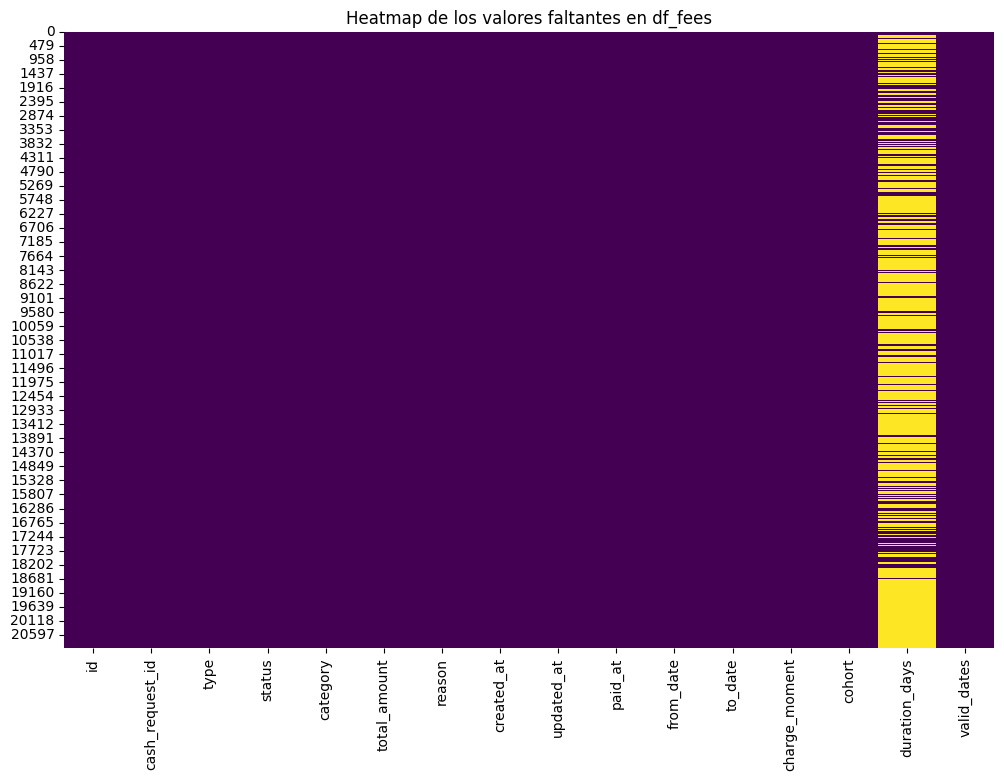

In [54]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_fees.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_fees")
plt.show()

In [57]:
# Compute durations
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days
df_fees['time_to_payment_days'] = (df_fees['paid_at'] - df_fees['from_date']).dt.days

# Display summary statistics
print("Summary of durations:")
print(df_fees['duration_days'].describe())

print("Summary of time to payment:")
print(df_fees['time_to_payment_days'].describe())


Summary of durations:
count    21061.000000
mean        20.228574
std          7.229693
min       -104.000000
25%         20.000000
50%         20.000000
75%         20.000000
max         92.000000
Name: duration_days, dtype: float64
Summary of time to payment:
count    21061.000000
mean        16.025972
std          6.158969
min        -52.000000
25%         14.000000
50%         20.000000
75%         20.000000
max         28.000000
Name: time_to_payment_days, dtype: float64


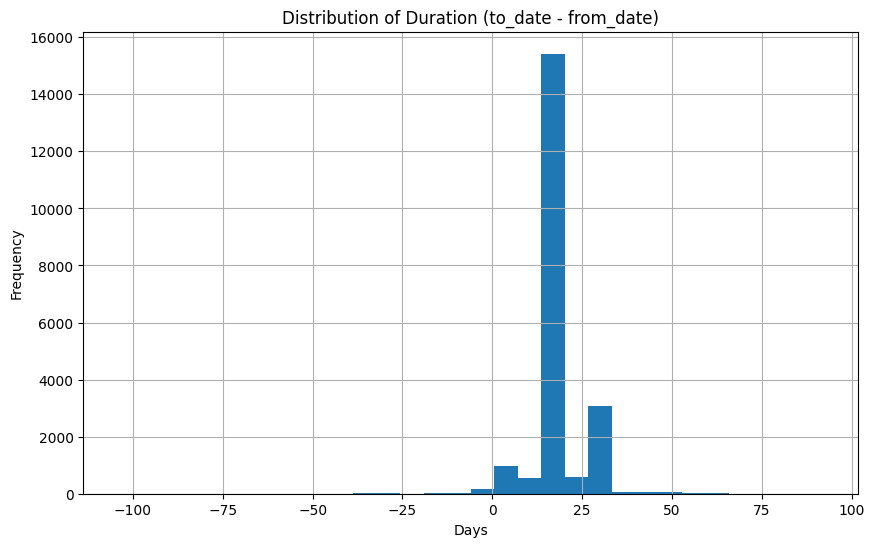

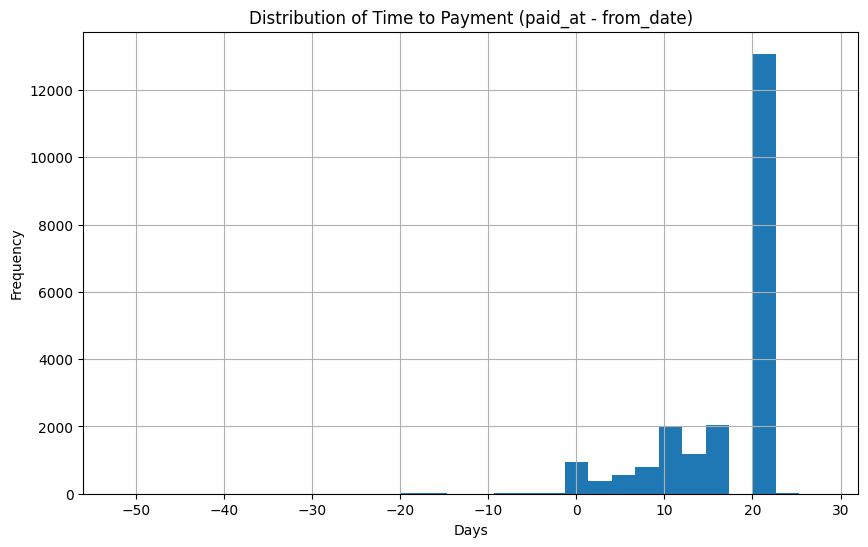

In [58]:
import matplotlib.pyplot as plt

# Histogram of durations
plt.figure(figsize=(10, 6))
df_fees['duration_days'].hist(bins=30)
plt.title("Distribution of Duration (to_date - from_date)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# Histogram of time to payment
plt.figure(figsize=(10, 6))
df_fees['time_to_payment_days'].hist(bins=30)
plt.title("Distribution of Time to Payment (paid_at - from_date)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


In [61]:
# Identify rows with negative durations
negative_durations = df_fees[df_fees['duration_days'] < 0]
print(f"Number of rows with negative durations: {len(negative_durations)}")

# Fix negative durations by setting 'to_date' to 'from_date' + mean_duration_days
df_fees.loc[df_fees['duration_days'] < 0, 'to_date'] = \
    df_fees.loc[df_fees['duration_days'] < 0, 'from_date'] + pd.Timedelta(days=mean_duration_days)

# Recompute durations
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days

# Validate the fix
print("Negative durations after fixing:", len(df_fees[df_fees['duration_days'] < 0]))


Number of rows with negative durations: 76
Negative durations after fixing: 0


In [63]:
# Identify rows with negative time to payment
negative_time_to_payment = df_fees[df_fees['time_to_payment_days'] < 0]
print(f"Number of rows with negative time to payment: {len(negative_time_to_payment)}")

# Fix negative 'paid_at' by setting it to the midpoint between 'from_date' and 'to_date'
df_fees.loc[df_fees['time_to_payment_days'] < 0, 'paid_at'] = \
    df_fees.loc[df_fees['time_to_payment_days'] < 0, 'from_date'] + \
    (df_fees.loc[df_fees['time_to_payment_days'] < 0, 'to_date'] - df_fees.loc[df_fees['time_to_payment_days'] < 0, 'from_date']) / 2

# Recompute time to payment
df_fees['time_to_payment_days'] = (df_fees['paid_at'] - df_fees['from_date']).dt.days

# Validate the fix
print("Negative time to payment after fixing:", len(df_fees[df_fees['time_to_payment_days'] < 0]))


Number of rows with negative time to payment: 76
Negative time to payment after fixing: 0


In [64]:
# Validate temporal relationships
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])
invalid_rows = df_fees[~df_fees['valid_dates']]
print(f"Rows with invalid date relationships: {len(invalid_rows)}")

Rows with invalid date relationships: 0


In [66]:
df_fees.describe()

,id,cash_request_id,total_amount,duration_days,time_to_payment_days
count,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000
mean,10645.355111,16317.671715,5.000237,20.396515,16.110916
std,6099.315256,6655.756850,0.034453,6.439866,5.846708
min,1.000000,1456.000000,5.000000,0.000000,0.000000
25%,5385.000000,11745.000000,5.000000,20.000000,14.000000
50%,10652.000000,17157.000000,5.000000,20.000000,20.000000
75%,15925.000000,21795.000000,5.000000,20.000000,20.000000
max,21193.000000,27010.000000,10.000000,92.000000,28.000000


In [68]:
# Guardar 'fees_new' como 'dataset.csv'
fees_new = df_fees

fees_new.to_csv('dataset.csv', index=False)
print("Los datos limpios han sido guardados como 'dataset.csv'")

Los datos limpios han sido guardados como 'dataset.csv'
